# LogisticRegression

## Using the MLBacktester Class

In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [2]:
df = pd.read_csv("five_minute_pairs.csv", parse_dates = ["time"], index_col = "time")
df

,EURUSD,GBPUSD,EURAUD
time,,,
2019-01-01 22:00:00+00:00,1.146580,1.274680,1.626230
2019-01-01 22:05:00+00:00,1.146350,1.274270,1.626170
2019-01-01 22:10:00+00:00,1.146320,1.274760,1.626290
2019-01-01 22:15:00+00:00,1.146320,1.274770,1.626290
2019-01-01 22:20:00+00:00,1.146530,1.274760,1.625620
...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,1.335140,1.617190
2020-08-30 23:40:00+00:00,1.191240,1.335250,1.616890
2020-08-30 23:45:00+00:00,1.191515,1.335515,1.616870


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 124056 entries, 2019-01-01 22:00:00+00:00 to 2020-08-30 23:55:00+00:00
Data columns (total 3 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   EURUSD  123350 non-null  float64
 1   GBPUSD  123169 non-null  float64
 2   EURAUD  123742 non-null  float64
dtypes: float64(3)
memory usage: 3.8 MB


In [4]:
import MLBacktester as MLB

### EURUSD

In [5]:
symbol = "EURUSD"

In [6]:
# cost
ptc = 0.00007

In [7]:
ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-31", ptc)

In [8]:
ml

MLBacktester(symbol = EURUSD, start = 2019-01-01, end = 2020-08-31, tc = 7e-05)

In [9]:
ml.data

,price,returns
time,,
2019-01-01 22:00:00+00:00,1.146580,NaN
2019-01-01 22:05:00+00:00,1.146350,-0.000201
2019-01-01 22:10:00+00:00,1.146320,-0.000026
2019-01-01 22:15:00+00:00,1.146320,0.000000
2019-01-01 22:20:00+00:00,1.146530,0.000183
...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080
2020-08-30 23:40:00+00:00,1.191240,0.000290
2020-08-30 23:45:00+00:00,1.191515,0.000231


In [10]:
ml.test_strategy(train_ratio = 0.7, lags = 5)

(0.176822, -0.893132)

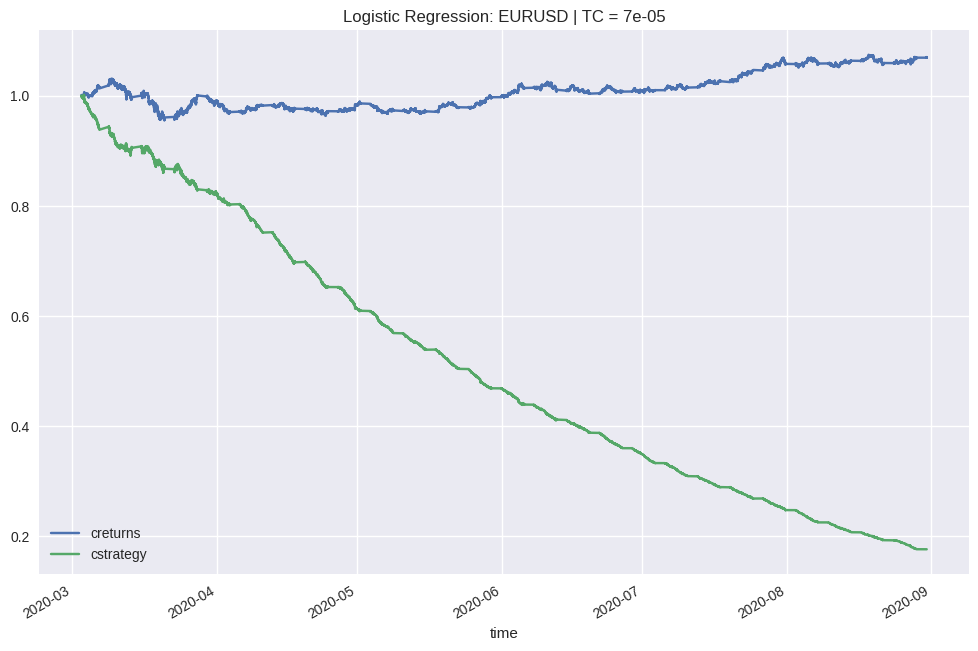

In [11]:
ml.plot_results()

In [12]:
ml.results

,price,returns,lag1,lag2,lag3,lag4,lag5,pred,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,,
2020-03-03 00:20:00+00:00,1.113645,-0.000139,-0.000206,-0.000135,-0.000265,0.000027,0.000058,1.0,-0.000139,0.0,0.999861,0.999861
2020-03-03 00:25:00+00:00,1.113745,0.000090,-0.000139,-0.000206,-0.000135,-0.000265,0.000027,1.0,0.000090,0.0,0.999951,0.999951
2020-03-03 00:30:00+00:00,1.113755,0.000009,0.000090,-0.000139,-0.000206,-0.000135,-0.000265,1.0,0.000009,0.0,0.999960,0.999960
2020-03-03 00:35:00+00:00,1.113770,0.000013,0.000009,0.000090,-0.000139,-0.000206,-0.000135,1.0,0.000013,0.0,0.999973,0.999973
2020-03-03 00:40:00+00:00,1.113450,-0.000287,0.000013,0.000009,0.000090,-0.000139,-0.000206,1.0,-0.000287,0.0,0.999686,0.999686
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.190895,-0.000080,-0.000092,0.000298,0.000046,0.000000,-0.000151,1.0,-0.000220,2.0,1.069218,0.176866
2020-08-30 23:40:00+00:00,1.191240,0.000290,-0.000080,-0.000092,0.000298,0.000046,0.000000,1.0,0.000290,0.0,1.069528,0.176917
2020-08-30 23:45:00+00:00,1.191515,0.000231,0.000290,-0.000080,-0.000092,0.000298,0.000046,-1.0,-0.000371,2.0,1.069775,0.176852


__The optimal Number of Lags__

In [13]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (0.099865, -0.96947)
2 (0.155496, -0.91381)
3 (0.152651, -0.916938)
4 (0.166359, -0.903375)
5 (0.176822, -0.893132)
6 (0.182555, -0.887548)
7 (0.18158, -0.888427)
8 (0.182021, -0.887977)
9 (0.192528, -0.877455)
10 (0.185703, -0.884588)
11 (0.191589, -0.878793)
12 (0.187334, -0.883111)
13 (0.185525, -0.884953)
14 (0.180646, -0.89)
15 (0.180219, -0.890533)
16 (0.178193, -0.893131)
17 (0.177386, -0.894054)
18 (0.179068, -0.89191)
19 (0.180449, -0.890399)
20 (0.180706, -0.890205)


In [14]:
ml.results.trades.value_counts()

0.0    22711
2.0    14275
Name: trades, dtype: int64

### EURAUD

In [15]:
symbol = "EURAUD"

In [16]:
ml = MLB.MLBacktester(symbol, "2019-01-01", "2020-08-31", ptc)

In [17]:
ml.test_strategy(train_ratio = 0.7, lags = 15)

(0.206303, -0.742483)

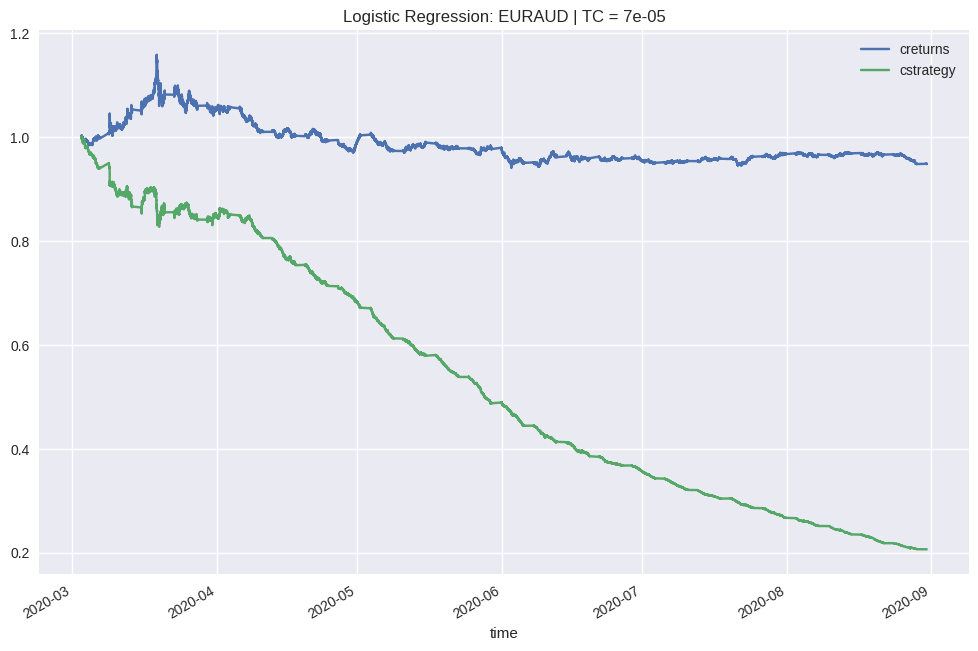

In [18]:
ml.plot_results()

__The optimal Number of Lags__

In [19]:
for lags in range(1, 21):
    print(lags, ml.test_strategy(train_ratio = 0.7, lags = lags))

1 (0.109425, -0.839542)
2 (0.190308, -0.758673)
3 (0.205002, -0.744606)
4 (0.204664, -0.744384)
5 (0.186531, -0.762803)
6 (0.19887, -0.75015)
7 (0.199846, -0.749296)
8 (0.198737, -0.750022)
9 (0.207177, -0.741342)
10 (0.198238, -0.751119)
11 (0.207125, -0.742118)
12 (0.204315, -0.744758)
13 (0.201265, -0.747538)
14 (0.206324, -0.742417)
15 (0.206303, -0.742483)
16 (0.188218, -0.760401)
17 (0.174496, -0.774076)
18 (0.179231, -0.769567)
19 (0.181259, -0.767884)
20 (0.188899, -0.760846)


In [20]:
ml.results

,price,returns,lag1,lag2,lag3,lag4,lag5,lag6,lag7,lag8,...,lag16,lag17,lag18,lag19,lag20,pred,strategy,trades,creturns,cstrategy
time,,,,,,,,,,,,,,,,,,,,,
2020-03-02 23:55:00+00:00,1.701685,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,-0.000047,0.000065,0.000285,...,-0.000302,0.000590,-0.000660,-0.000015,-0.000414,1.0,-0.000482,0.0,0.999518,0.999518
2020-03-03 00:00:00+00:00,1.703020,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,-0.000047,0.000065,...,0.000332,-0.000302,0.000590,-0.000660,-0.000015,1.0,0.000784,0.0,1.000302,1.000302
2020-03-03 00:05:00+00:00,1.703940,0.000540,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,-0.000047,...,-0.000129,0.000332,-0.000302,0.000590,-0.000660,-1.0,-0.000680,2.0,1.000843,0.999622
2020-03-03 00:10:00+00:00,1.703895,-0.000026,0.000540,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,0.000176,...,0.000405,-0.000129,0.000332,-0.000302,0.000590,-1.0,0.000026,0.0,1.000816,0.999649
2020-03-03 00:15:00+00:00,1.703560,-0.000197,-0.000026,0.000540,0.000784,-0.000482,-0.000634,-0.000364,-0.000238,0.000050,...,0.000252,0.000405,-0.000129,0.000332,-0.000302,-1.0,0.000197,0.0,1.000620,0.999845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-30 23:35:00+00:00,1.617190,-0.000108,0.000040,-0.000043,0.000006,0.000012,0.000121,0.000099,-0.000083,0.000195,...,0.000232,-0.000111,-0.000142,-0.000257,-0.000294,-1.0,0.000108,0.0,0.949889,0.188953
2020-08-30 23:40:00+00:00,1.616890,-0.000186,-0.000108,0.000040,-0.000043,0.000006,0.000012,0.000121,0.000099,-0.000083,...,0.000356,0.000232,-0.000111,-0.000142,-0.000257,1.0,-0.000326,2.0,0.949712,0.188892
2020-08-30 23:45:00+00:00,1.616870,-0.000012,-0.000186,-0.000108,0.000040,-0.000043,0.000006,0.000012,0.000121,0.000099,...,0.000096,0.000356,0.000232,-0.000111,-0.000142,1.0,-0.000012,0.0,0.949701,0.188889


In [21]:
hits = np.sign(ml.results.returns * ml.results.pred).value_counts()
hits

 1.0    19238
-1.0    17725
 0.0      141
dtype: int64

In [22]:
hit_ratio = hits[1.0] / sum(hits)
hit_ratio

0.5184885726606295